# 量子位相推定

量子位相推定は、量子計算における最も重要なサブルーチンの1つです。 多くの量子アルゴリズムの中心的な構成要素として機能します。このアルゴリズムの目的は次のとおりです。

ユニタリ演算子$U$が、 $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$のように与えられた場合に、$\theta$を推定します。 ここで、$|\psi\rangle$ は固有ベクトルであり、$e^{\boldsymbol{2\pi i}\theta}$は対応する固有値です。$U$ はユニタリーなので、すべての固有値のノルムは1です。

## 1. 概要 <a id='overview'></a>

位相推定の一般的な量子回路を以下に示します。 上側のレジスターには$t$個の「カウント」量子ビットがあり、下のレジスターには$|\psi\rangle$の状態の量子ビットがあります：
![image1](images/qpe_tex_qz.png)


### 1.1 直感的解釈 <a id='intuition'></a>

量子位相推定アルゴリズムは、位相キックバックを使用して、$U$の（フーリエ基底における）位相をカウントレジスターの$t$ 量子ビットに書き込みます。次に、逆QFTを使用して、フーリエ基底から計算基底に変換し、測定します。

（QFTの章から）フーリエ基底では、 $0$から数えて$2^t$回で最上位の量子ビットが1回転したことを覚えているでしょう。  $0$から$2^t$の間の数である$x$を数えるには、この量子ビットをz軸を中心に$\tfrac{x}{2^t}$ 回転させます。 次の量子ビットでは$\tfrac{2x}{2^t}$回転し、3番目の量子ビットでは$\tfrac{4x}{2^t}$回転します。

![image2](images/qpe_intuition.jpg)


制御$U$ゲートを使うと、量子ビットは（キックバックにより）位相 $e^{2i\pi\theta}$に比例して回転します。 連続して$CU$ゲートを使用して、フーリエ基底で$0$ 〜 $2^t$の数値として位相$\theta$をエンコードできるところまで、この回転を適切な回数繰り返します。

次に、$QFT^\dagger$を使用してこれを計算基底に変換します。

### 1.2 基礎となる数学 <a id='maths'></a>

上記のように、この回路はユニタリー演算子$U$の位相を推定します。$U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$において、$|\psi\rangle$は固有ベクトル、$e^{\boldsymbol{2\pi i}\theta}$は対応する固有値で、$\theta$を推定します。回路は次の手順です。

i. **準備**：$\vert\psi\rangle$を1量子ビットレジスターにセットします。 別の$n$個の量子ビットのセットは、値$2^n\theta$を格納するカウントレジスターです。


$$ \psi_0 = \lvert 0 \rangle^{\otimes n} \lvert \psi \rangle$$

 

ii. **重ね合わせ**：$n$ビットのアダマールゲート操作$H^{\otimes n}$をカウントレジスターに適用します。



$$ \psi_1 = {\frac {1}{2^{\frac {n}{2}}}}\left(|0\rangle +|1\rangle \right)^{\otimes n} \lvert \psi \rangle$$



iii. **制御ユニタリー演算**：制御ビットが $|1\rangle$ の場合にのみ、ターゲットレジスターにユニタリー演算子 $U$ を適用する、制御ユニタリー演算 $C-U$ を導入する必要があります。 $U$ は、 $U|\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$ となる固有ベクトル $|\psi\rangle$ のユニタリー演算子であるため、次のようになります。


$$
U^{2^{j}}|\psi \rangle =U^{2^{j}-1}U|\psi \rangle =U^{2^{j}-1}e^{2\pi i\theta }|\psi \rangle =\cdots =e^{2\pi i2^{j}\theta }|\psi \rangle
$$


すべての𝑛制御演算子 $C − U^{2^j}$ を $0\leq j\leq n-1$ において適用し、 $|0\rangle \otimes |\psi \rangle +|1\rangle \otimes e^{2\pi i\theta }|\psi \rangle =\left(|0\rangle +e^{2\pi i\theta }|1\rangle \right)\otimes |\psi \rangle$ を使用すると以下のようになります。

$$
\begin{aligned}
\psi_{2} & =\frac {1}{2^{\frac {n}{2}}} \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{n-1}}}|1\rangle \right) \otimes \cdots \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{1}}}\vert1\rangle \right) \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{0}}}\vert1\rangle \right) \otimes |\psi\rangle\\\\
& = \frac{1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes \vert\psi\rangle
\end{aligned}
$$

ここで、$k$ はnビットの2進数の整数表現です。

iv. **逆フーリエ変換**：上の式は、[量子フーリエ変換とそのQiskit実装](../ch-algorithms/quantum-fourier-transform.html)のnotebookで導出したように、量子フーリエ変換を適用した結果であることに注意してください。 QFTがn量子ビットの入力状態$\vert x\rangle$を出力として以下のようにマップすることを思い出してください。

$$
QFT\vert x \rangle = \frac{1}{2^\frac{n}{2}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
$$

上の式で $x$ を $2^n\theta$ に置き換えると、上記のステップ2で導出された式が正確に得られます。したがって、状態 $\vert2^n\theta\rangle$ を復元するには、補助レジスターに逆フーリエ変換を適用します。そうすることで、以下を得られます。
$$
\vert\psi_3\rangle = \frac {1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes | \psi \rangle \xrightarrow{\mathcal{QFT}_n^{-1}} \frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{k=0}^{2^{n}-1} e^{-\frac{2\pi i k}{2^n}(x - 2^n \theta)} |x\rangle \otimes |\psi\rangle
$$ 

v. **測定**：上記の式は$x = 2^n\theta$付近でピークになります。$2^n\theta$が整数の場合、計算基底で測定すると、高い確率で補助レジスターに位相が得られます。


$$ |\psi_4\rangle = | 2^n \theta \rangle \otimes | \psi \rangle$$


$2^n\theta$が整数でない場合、上記の式は $x = 2^n\theta$ の近くでピークに達し、その確率は$4/\pi^2 \approx 40\%$よりも高いものになります[1]。


## 2. 例：Tゲート <a id='example_t_gate'></a>

みなさんがよく知っている$T$ゲートを例として取り上げ、量子位相推定を使用してその位相を推定します。$T$ゲートは状態$|1\rangle$に位相$e^\frac{i\pi}{4}$ を追加することを思い出してください。

$$ T|1\rangle = 
\begin{bmatrix}
1 & 0\\
0 & e^\frac{i\pi}{4}\\ 
\end{bmatrix}
\begin{bmatrix}
0\\
1\\ 
\end{bmatrix}
= e^\frac{i\pi}{4}|1\rangle $$


以下の式で与えられる $\theta$ についてQPEを使って、


$$ T|1\rangle = e^{2i\pi\theta}|1\rangle $$



$\theta$を見つけることができます：


$$\theta = \frac{1}{8}$$


この例では、3量子ビットを使用して、 _正確な_ 結果（推定ではありません！）を得ます。

### 2.1 回路の作成 <a id='creating_the_circuit'></a>
まず、環境を準備しましょう。

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

次に、量子回路を設定します。 4量子ビットを使用します。qubit 0〜2はカウント量子ビットとして、qubit 3はユニタリー演算子（$T$）の固有状態として使用します。

$X$ ゲートを適用して、$\vert\psi\rangle = \vert1\rangle$と初期化します。

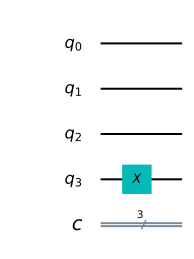

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

カウント量子ビットにアダマールゲートをかけます：

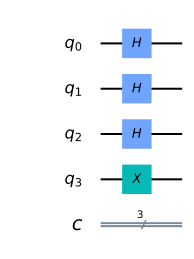

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

次に、制御ユニタリー演算を実行します。**注意**：Qiskitでは量子ビットが上の画像とは逆のむきに並びます。

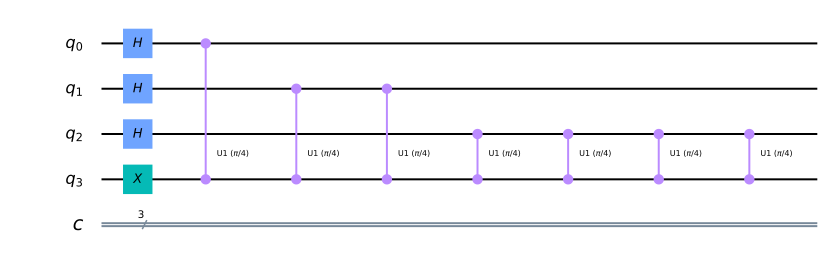

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw()

逆量子フーリエ変換を適用して、カウントレジスターの状態を変換します。 ここでは、$QFT^\dagger$のコードを以下のように与えます。

In [5]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

次に、カウントレジスターを測定します。

In [6]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

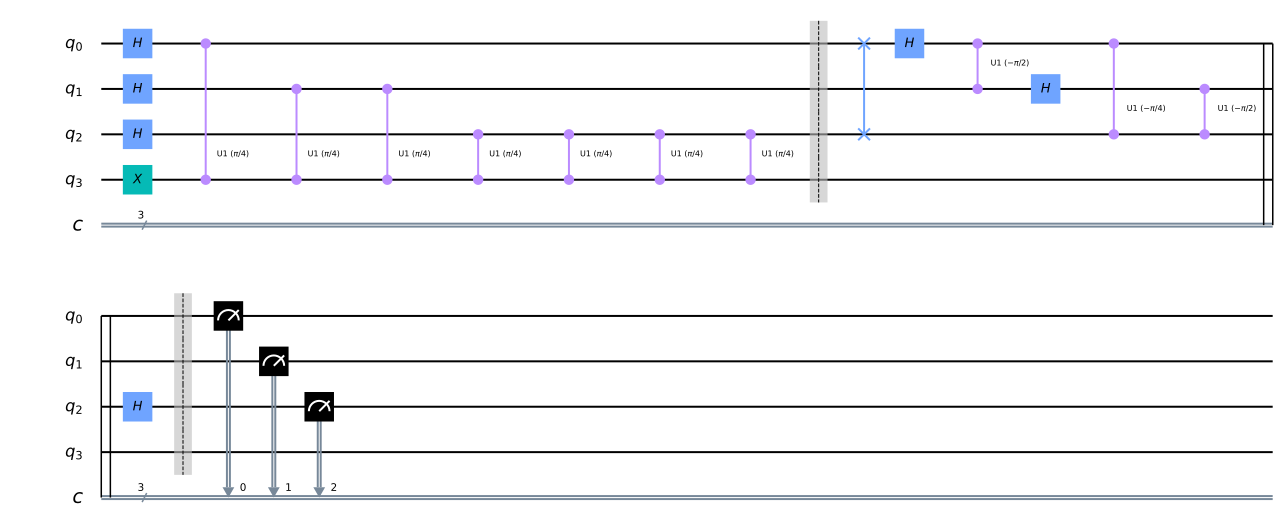

In [7]:
qpe.draw()

### 2.2 結果 <a id='results'></a>

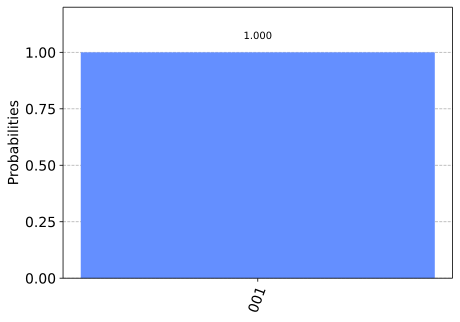

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

結果（`001`）のみが得られ、これは10進数に変換されると `1`となります。$\theta$の結果を得るには、結果（`1`）を$2^n$で割る必要があります。



$$ \theta = \frac{1}{2^3} = \frac{1}{8} $$



これはまさに私たちが期待した結果です！

## 3. 例：より精度を高める <a id='getting_more_precision'></a>
### 3.1 問題 <a id='the_problem'></a>


$T$ゲートの代わりに、$\theta = \frac{1}{3}$のゲートを使用してみましょう。上の例のように回路を準備しました。

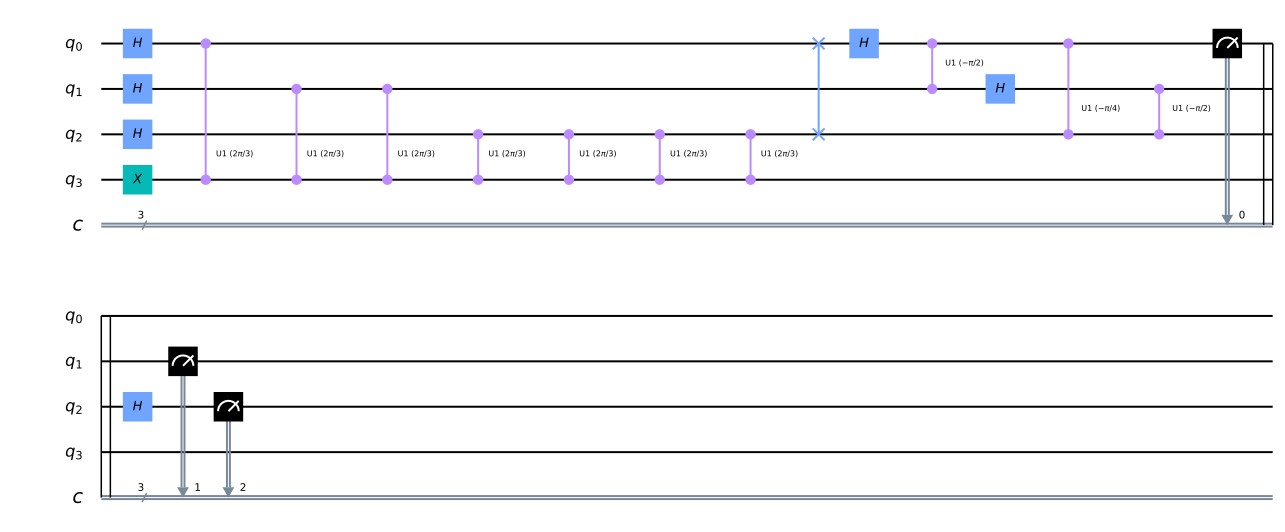

In [9]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

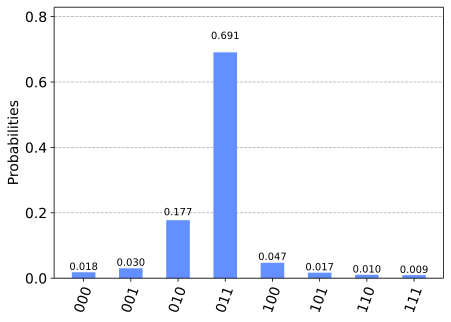

In [10]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

予測される結果は$\theta = 0.3333\dots$です。実行の結果、最も可能性の高い結果は`010(bin) = 2(dec)` と`011(bin) = 3(dec)`であることが見てわかります。 これらの2つの結果から、それぞれ$\theta = 0.25$ (off by 25%) と$\theta = 0.375$ (off by 13%)が得られます。$\theta$ の真の値は、カウントビットから取得できる値の間にあり、この回路は、不確実であり不正確であることがわかります。

### 3.2 解決策 <a id='the_solution'></a>
より精度を上げるには、カウント量子ビットを追加するだけです。 さらに2つのカウント量子ビットを追加しましょう。

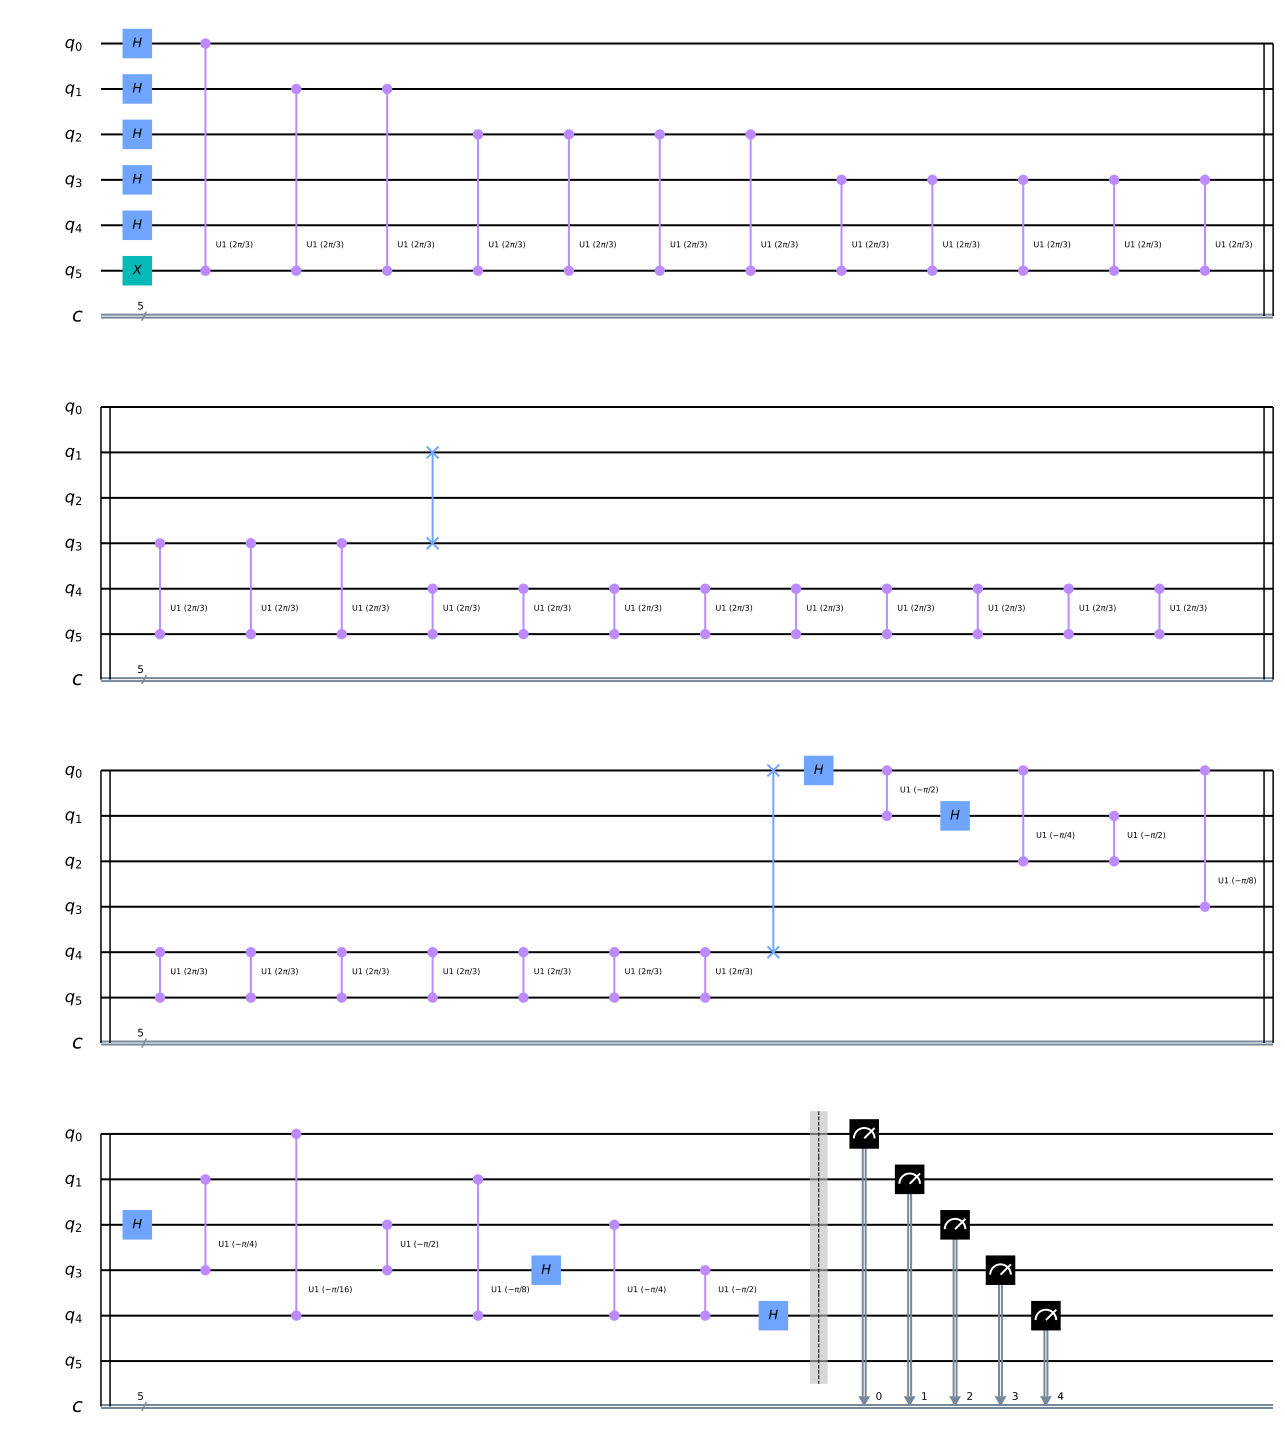

In [11]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()

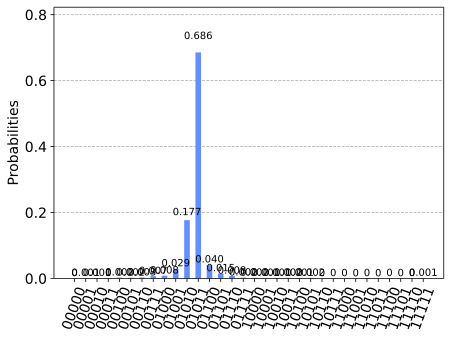

In [12]:
### Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
qobj = assemble(t_qpe3, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

最も可能性の高い2つの測定結果は、`01011`（10進数の11）と`01010` (10進数の10）です。 これらから、次のように$\theta$が求められます。

$$
\theta = \frac{11}{2^5} = 0.344,\;\text{  or  }\;\; \theta = \frac{10}{2^5} = 0.313
$$

この2つの結果の$\frac{1}{3}$ との誤差は、それぞれ3％と6％です。さきほどよりずっと優れた精度の結果が得られました！

## 4. 実デバイスでの実験 <a id='real_devices'></a>
### 4.1 2.1の回路で <a id='circuit_2.1'></a>

2.1節の回路は実際のデバイスで実行できます。回路を思い出してみましょう。

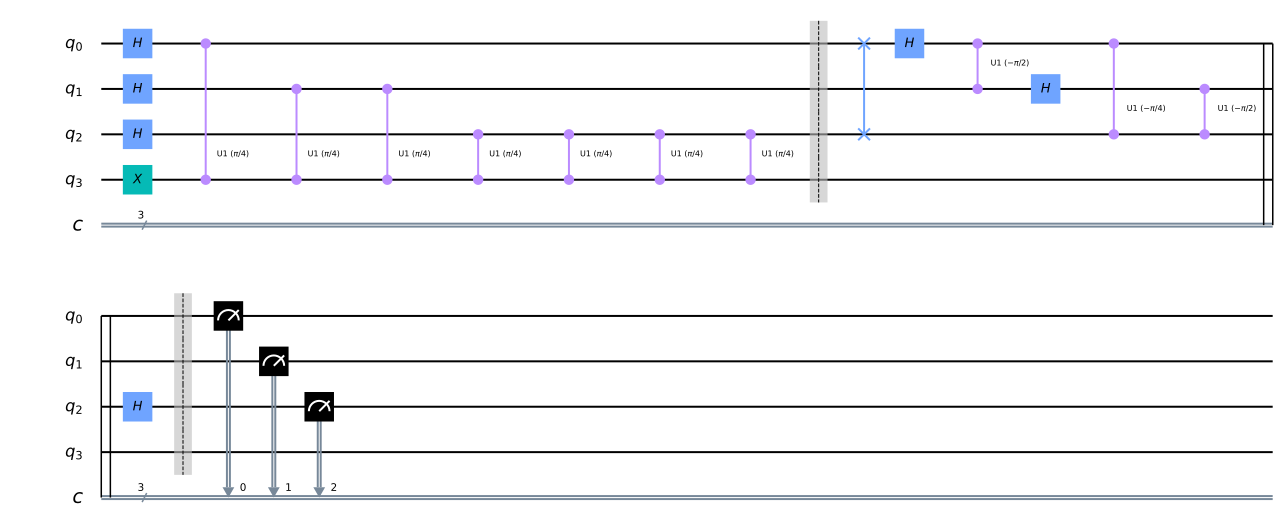

In [13]:
qpe.draw()

In [14]:
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
santiago = provider.get_backend('ibmq_santiago')

# Run with 2048 shots
shots = 2048
t_qpe = transpile(qpe, santiago, optimization_level=3)
job = santiago.run(t_qpe, shots=shots)
job_monitor(job)

Job Status: job has successfully run


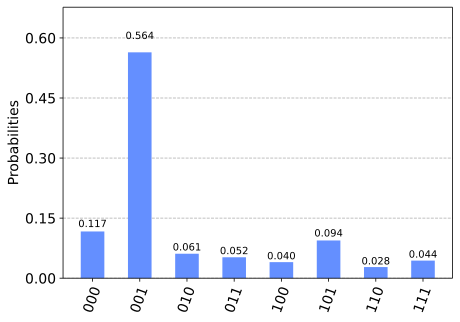

In [15]:
# get the results from the computation
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)

うまくいけば、最も可能性の高い結果は、シミュレーターから期待される結果である `001` になることがわかります。 シミュレーターとは異なり、 `001`以外も測定される可能性があります。これは、量子コンピューターにおけるノイズとゲートエラーによるものです。

## 5. 練習問題 <a id='exercises'></a>

1. 異なるゲート（$\text{CNOT}$, 制御$S$, 制御$T^\dagger$）で上記の実験を試してください。どのような結果が期待できますか？ どのような結果が得られますか？

2. 制御$Y$ゲートを使って実験してみてください。正しい結果が得られますか？ （ヒント：$|\psi\rangle$ が$Y$の固有状態であることを確認してください！）

## 6. 今後の展望 <a id='looking_forward'></a>

制御$U$演算を実行するには $\theta$ を知っている必要があったため、量子位相推定アルゴリズムは無意味に見えるかもしれません。後の章で、$\theta$ が不明な状態で回路を作る方法を学び、この$\theta$ について学習することで、非常に有用な情報が得られることが分かります（最も有名なのは、数を因数分解する方法です！）。

## 7. 参考文献 <a id='references'></a>

[1] Michael A. Nielsen and Isaac L. Chuang. 2011. Quantum Computation and Quantum Information: 10th Anniversary Edition (10th ed.). Cambridge University Press, New York, NY, USA. 

## 8. 寄稿者 <a id='contributors'></a>
03/20/2020 — Hwajung Kang (@HwajungKang) — Fixed inconsistencies with qubit ordering

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}